<a href="https://colab.research.google.com/github/ARUNIMO/Autism_Screening/blob/main/EDA_Autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [20]:
from google.colab import files

upload_file = files.upload()

Saving Autism_Data.arff to Autism_Data (1).arff


In [21]:
Autism = pd.read_csv('Autism_Data.arff')
Autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [ ]:
#Data inspection and cleaning

In [22]:
Autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [23]:
Autism['Class/ASD'].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

In [24]:
Autism.drop('age_desc',axis=1,inplace=True)
Autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,?,NO


In [25]:
Autism = Autism.rename(columns={'austim':'family member with PDD','jundice':'jaundice','contry_of_res':'country_of_res'})

In [26]:
Autism['age'] = Autism['age'].apply(lambda x: np.nan if x == '?' else int(x))
Autism['gender'] = Autism['gender'].map({'m':1,'f':0})
Autism['jaundice'] = Autism['jaundice'].map({'yes':1,'no':0})
Autism['family member with PDD'] = Autism['family member with PDD'].map({'yes':1,'no':0})
Autism['used_app_before'] = Autism['used_app_before'].map({'yes':1,'no':0})
Autism['Class/ASD'] = Autism['Class/ASD'].map({'YES':1,'NO':0})

In [27]:
Autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1_Score                704 non-null    int64  
 1   A2_Score                704 non-null    int64  
 2   A3_Score                704 non-null    int64  
 3   A4_Score                704 non-null    int64  
 4   A5_Score                704 non-null    int64  
 5   A6_Score                704 non-null    int64  
 6   A7_Score                704 non-null    int64  
 7   A8_Score                704 non-null    int64  
 8   A9_Score                704 non-null    int64  
 9   A10_Score               704 non-null    int64  
 10  age                     702 non-null    float64
 11  gender                  704 non-null    int64  
 12  ethnicity               704 non-null    object 
 13  jaundice                704 non-null    int64  
 14  family member with PDD  704 non-null    in

In [28]:
Autism['A9_Score'].value_counts()

0    476
1    228
Name: A9_Score, dtype: int64

In [29]:
Autism['ethnicity'] = Autism['ethnicity'].apply(lambda x: 'Others' if x == '?' else x)
Autism['ethnicity'] = Autism['ethnicity'].apply(lambda x: 'Others' if x == 'others' else x)
Autism['ethnicity'] = Autism['ethnicity'].apply(lambda x: 'Hispanic' if x == 'Latino' else x)

In [30]:
Autism['relation'] = Autism['relation'].apply(lambda x: 'Caregiver' if x == '?' else x)

In [31]:
Autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1_Score                704 non-null    int64  
 1   A2_Score                704 non-null    int64  
 2   A3_Score                704 non-null    int64  
 3   A4_Score                704 non-null    int64  
 4   A5_Score                704 non-null    int64  
 5   A6_Score                704 non-null    int64  
 6   A7_Score                704 non-null    int64  
 7   A8_Score                704 non-null    int64  
 8   A9_Score                704 non-null    int64  
 9   A10_Score               704 non-null    int64  
 10  age                     702 non-null    float64
 11  gender                  704 non-null    int64  
 12  ethnicity               704 non-null    object 
 13  jaundice                704 non-null    int64  
 14  family member with PDD  704 non-null    in

In [32]:
Autism['ethnicity'].value_counts()

White-European       233
Others               126
Asian                123
'Middle Eastern '     92
Black                 43
'South Asian'         36
Hispanic              33
Pasifika              12
Turkish                6
Name: ethnicity, dtype: int64

In [33]:
#EDA

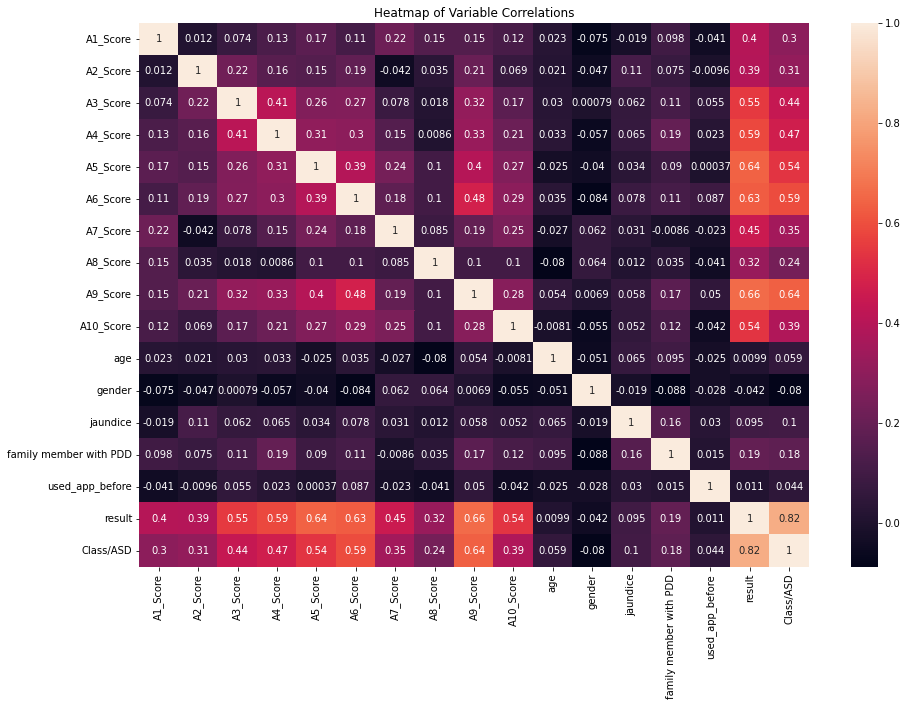

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(Autism.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [36]:
#ASD correlates with A9, A6, A5 and A4 scores. Also corelates highly with result which is expected.

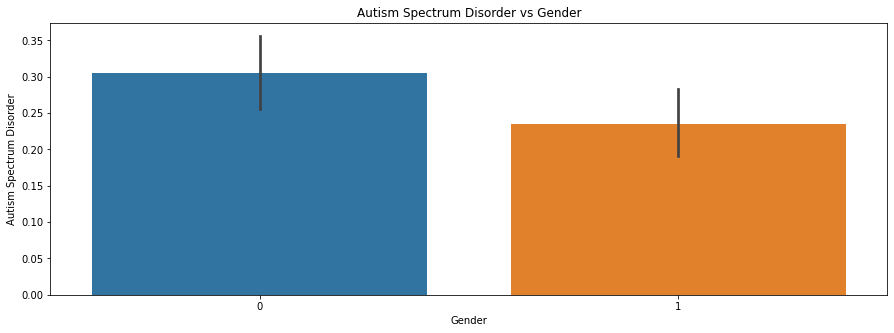

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='gender',y='Class/ASD',data=Autism)
plt.title('Autism Spectrum Disorder vs Gender')
plt.xlabel('Gender')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

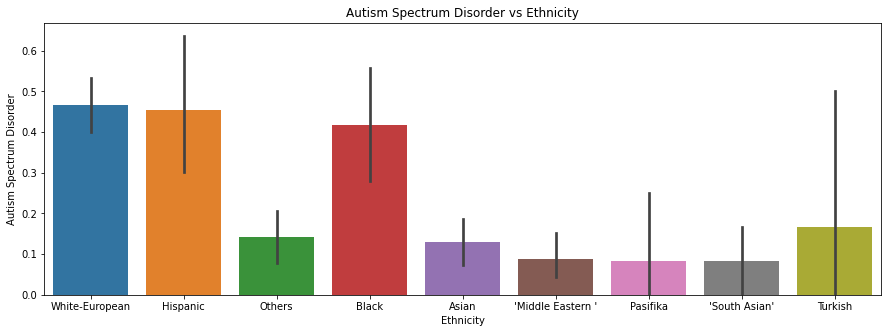

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x='ethnicity',y='Class/ASD',data=Autism)
plt.title('Autism Spectrum Disorder vs Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

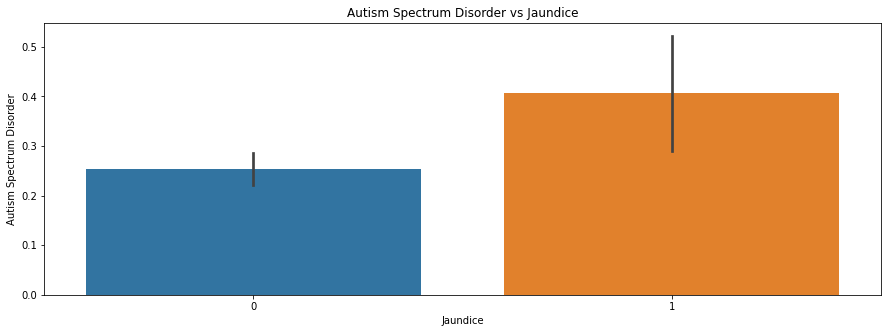

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x='jaundice',y='Class/ASD',data=Autism)
plt.title('Autism Spectrum Disorder vs Jaundice')
plt.xlabel('Jaundice')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

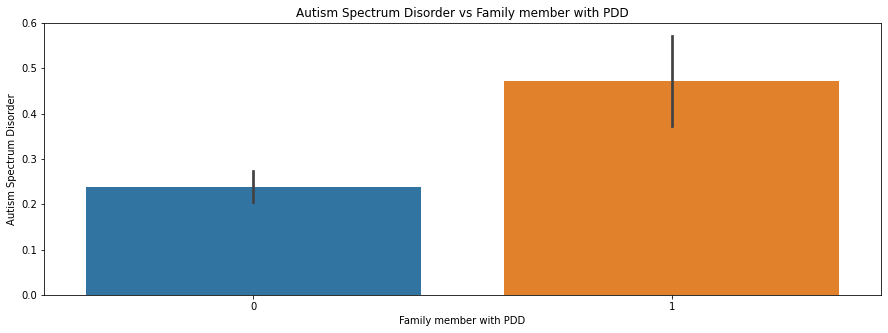

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x='family member with PDD',y='Class/ASD',data=Autism)
plt.title('Autism Spectrum Disorder vs Family member with PDD')
plt.xlabel('Family member with PDD')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

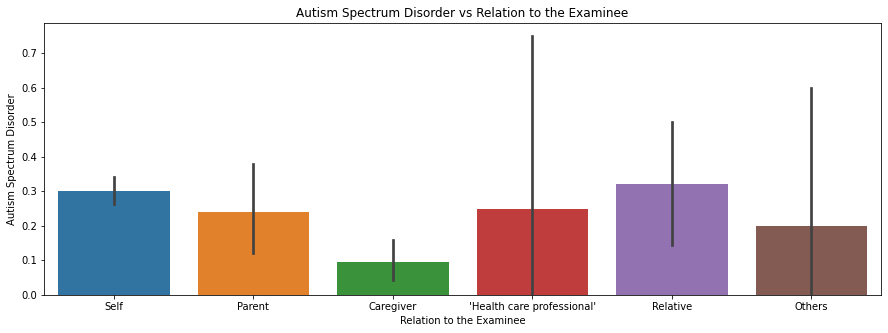

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x='relation',y='Class/ASD',data=Autism)
plt.title('Autism Spectrum Disorder vs Relation to the Examinee')
plt.xlabel('Relation to the Examinee')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

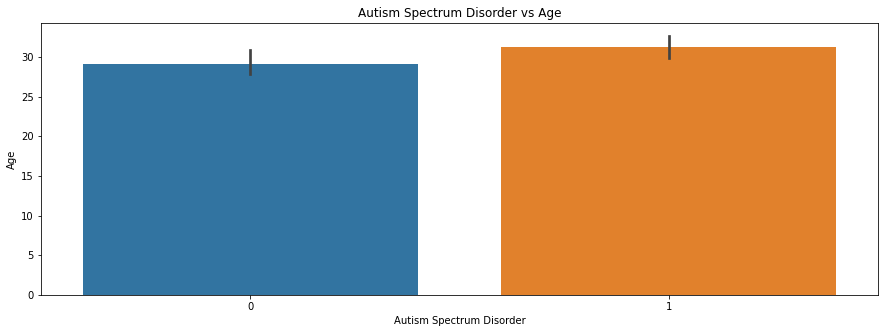

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='Class/ASD',y='age',data=Autism)
plt.title('Autism Spectrum Disorder vs Age')
plt.ylabel('Age')
plt.xlabel('Autism Spectrum Disorder')
plt.show()

In [42]:
pd.set_option('display.max_rows', 100)
Autism['country_of_res'].value_counts()

'United States'           113
'United Arab Emirates'     82
'New Zealand'              81
India                      81
'United Kingdom'           77
Jordan                     47
Australia                  27
Canada                     15
'Sri Lanka'                14
Afghanistan                13
France                     11
Netherlands                10
Brazil                      9
Mexico                      8
Russia                      7
Iran                        7
Ireland                     5
Malaysia                    5
'Viet Nam'                  5
Italy                       5
Germany                     4
Austria                     4
Philippines                 4
'Saudi Arabia'              4
Kazakhstan                  3
Belgium                     3
Romania                     3
Spain                       3
Bangladesh                  3
Pakistan                    3
Egypt                       3
Sweden                      2
AmericanSamoa               2
Ethiopia  

In [43]:
Autism_country_of_res = pd.DataFrame(Autism['country_of_res'].value_counts())
lis = list(Autism_country_of_res[Autism_country_of_res.country_of_res < 10].index)
Autism['country_of_res'] = Autism['country_of_res'].apply(lambda x: 'Others' if x in lis else x)
Autism['country_of_res'].value_counts()

Others                    133
'United States'           113
'United Arab Emirates'     82
'New Zealand'              81
India                      81
'United Kingdom'           77
Jordan                     47
Australia                  27
Canada                     15
'Sri Lanka'                14
Afghanistan                13
France                     11
Netherlands                10
Name: country_of_res, dtype: int64

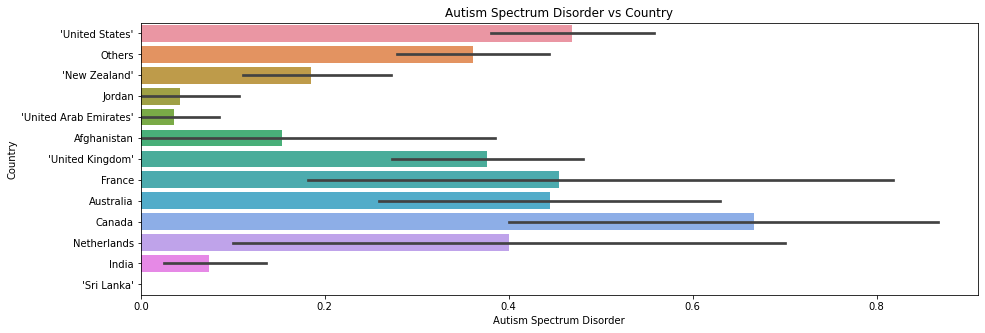

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x='Class/ASD',y='country_of_res',data=Autism)
plt.title('Autism Spectrum Disorder vs Country')
plt.ylabel('Country')
plt.xlabel('Autism Spectrum Disorder')
plt.show()

In [45]:
#Model building
#We will build a model to predict the a case of ASD or not based on the features provided.

In [46]:
Autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1_Score                704 non-null    int64  
 1   A2_Score                704 non-null    int64  
 2   A3_Score                704 non-null    int64  
 3   A4_Score                704 non-null    int64  
 4   A5_Score                704 non-null    int64  
 5   A6_Score                704 non-null    int64  
 6   A7_Score                704 non-null    int64  
 7   A8_Score                704 non-null    int64  
 8   A9_Score                704 non-null    int64  
 9   A10_Score               704 non-null    int64  
 10  age                     702 non-null    float64
 11  gender                  704 non-null    int64  
 12  ethnicity               704 non-null    object 
 13  jaundice                704 non-null    int64  
 14  family member with PDD  704 non-null    in

In [47]:
temp = pd.get_dummies(Autism['ethnicity'],drop_first=False)
Autism = pd.concat([Autism,temp],axis=1)
Autism.drop('ethnicity',axis=1,inplace=True)

temp = pd.get_dummies(Autism['country_of_res'],drop_first=False)
Autism = pd.concat([Autism,temp],axis=1)
Autism.drop('country_of_res',axis=1,inplace=True)

temp = pd.get_dummies(Autism['relation'],drop_first=False)
Autism = pd.concat([Autism,temp],axis=1)
Autism.drop('relation',axis=1,inplace=True)

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [49]:
imputer = IterativeImputer()
col = Autism.columns
Autism = imputer.fit_transform(Autism)
Autism = pd.DataFrame(Autism,columns=col)

In [50]:
Autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,India,Jordan,Netherlands,Others,'Health care professional',Caregiver,Others,Parent,Relative,Self
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
Autism.age.value_counts()
Autism.age = Autism.age.round(decimals=0)
Autism.age.value_counts()

21.0     49
20.0     46
23.0     37
22.0     37
19.0     35
24.0     34
27.0     31
18.0     31
30.0     30
26.0     29
29.0     28
25.0     27
28.0     24
31.0     21
17.0     18
32.0     18
35.0     17
37.0     17
33.0     16
40.0     16
42.0     15
36.0     13
38.0     12
34.0     12
43.0     11
44.0     10
47.0      8
39.0      7
53.0      6
55.0      6
46.0      6
50.0      5
52.0      5
45.0      4
48.0      4
49.0      3
41.0      3
58.0      2
54.0      2
56.0      2
61.0      2
59.0      1
64.0      1
60.0      1
383.0     1
51.0      1
Name: age, dtype: int64

In [52]:
Autism['Class/ASD'].value_counts()

0.0    515
1.0    189
Name: Class/ASD, dtype: int64

In [53]:
#Dropping the result column as it is an amalgamation of the A1 to 10 columns. 

In [54]:
X = Autism.drop(['Class/ASD','result'],axis=1)
y = Autism['Class/ASD']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=True)
X_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,India,Jordan,Netherlands,Others,'Health care professional',Caregiver,Others,Parent,Relative,Self
133,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
615,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
591,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
517,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
#Using recall as well as accuracy for scoring. However focussing on the recall models since we are dealing with an important 
#adverse human condition. 

In [57]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')

params = {'n_estimators':[200],
          'min_samples_leaf':[2,5,10,15,30,40,50],
          'max_depth':[3,5,10,20,40,50],
          'max_features':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7],
          'criterion':["gini"]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='recall')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 546 candidates, totalling 2730 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 20, 40, 50],
                         'max_features': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                                          0.45, 0.5, 0.55, 0.6, 0.65, 0.7],
                         'min_samples_leaf': [2, 5, 10, 15, 30, 40, 50],
                         'n_estimators': [200]},
             scoring='recall', verbose=1)

In [58]:
Model_best = grid_search.best_estimator_


0.9360189573459715
0.9734513274336283


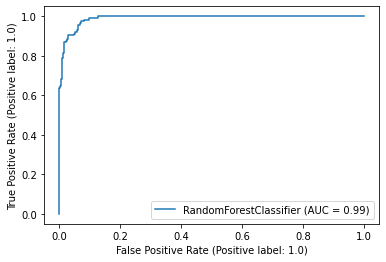

In [59]:
from sklearn.metrics import plot_roc_curve, accuracy_score, recall_score
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.925531914893617
0.8947368421052632


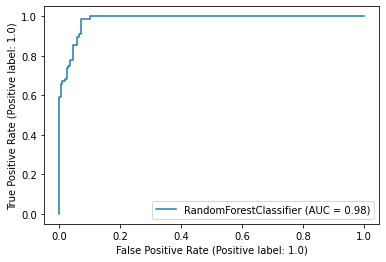

In [60]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [61]:
Feature_importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Importance',ascending=False)
Feature_importance = Feature_importance.set_index('Feature')
Feature_importance.head()

,Importance
Feature,
A9_Score,0.206577
A5_Score,0.159253
A4_Score,0.135674
A6_Score,0.117753
A3_Score,0.079832


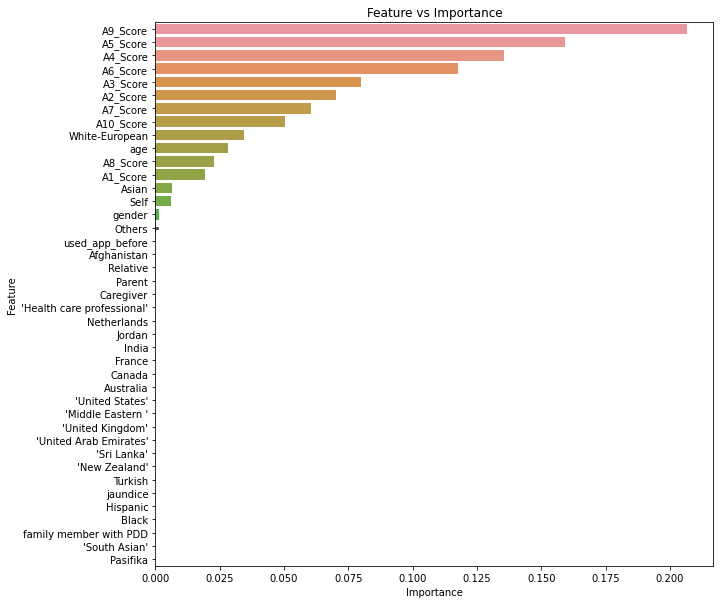

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(x='Importance',y=Feature_importance.index,data=Feature_importance)
plt.title('Feature vs Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [63]:
#As we can see we get prety good accuracy and recall scores using recall as scoring. Now let us try using accuracy as scoring.

In [64]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')

params = {'n_estimators':[200],
          'min_samples_leaf':[2,5,10,15,30,40,50],
          'max_depth':[3,5,10,20,40,50],
          'max_features':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6],
          'criterion':["gini"]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 462 candidates, totalling 2310 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 20, 40, 50],
                         'max_features': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                                          0.45, 0.5, 0.55, 0.6],
                         'min_samples_leaf': [2, 5, 10, 15, 30, 40, 50],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [65]:
Model_best = grid_search.best_estimator_

0.995260663507109
1.0


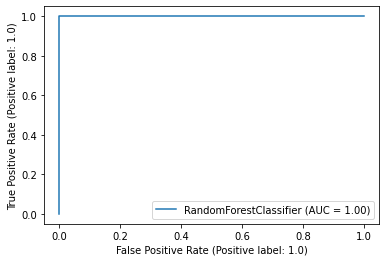

In [66]:
from sklearn.metrics import plot_roc_curve, accuracy_score, recall_score
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.9609929078014184
0.9210526315789473


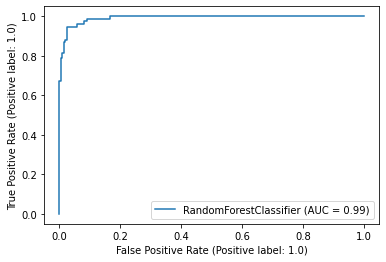

In [67]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [68]:
Feature_importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Importance',ascending=False)
Feature_importance = Feature_importance.set_index('Feature')
Feature_importance.head()

,Importance
Feature,
A9_Score,0.217280
A5_Score,0.147078
A6_Score,0.117689
A4_Score,0.086354
A3_Score,0.061562


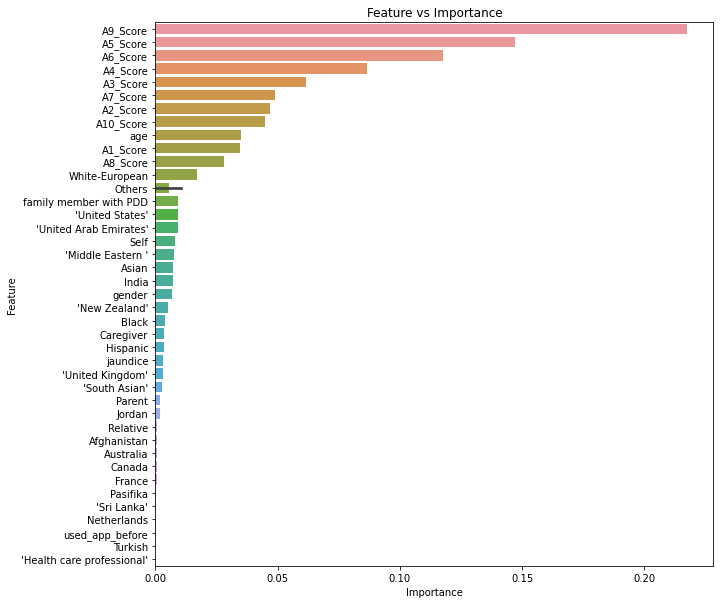

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(x='Importance',y=Feature_importance.index,data=Feature_importance)
plt.title('Feature vs Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [70]:
#As we can see we here from the feature importance there is a larger number of features that actually contribute to the predict 
#the target variable. 
#We will now try SVMs. We will build models using both recal and accuracy scoring. 

In [71]:
from sklearn.svm import SVC

In [72]:
col = X.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=col)
X_scaled.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,India,Jordan,Netherlands,Others,'Health care professional',Caregiver,Others,Parent,Relative,Self
0,0.62115,1.098588,1.089190,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,-1.160460,...,-0.360577,-0.267465,-0.120038,-0.482623,-0.075593,-0.394960,-0.084576,-0.276501,-0.203519,0.590474
1,0.62115,1.098588,-0.918113,1.008559,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,0.861727,...,-0.360577,-0.267465,-0.120038,2.072012,-0.075593,-0.394960,-0.084576,-0.276501,-0.203519,0.590474
2,0.62115,1.098588,-0.918113,1.008559,1.002845,-0.629941,1.180914,0.735174,1.444894,0.861727,...,-0.360577,-0.267465,-0.120038,2.072012,-0.075593,-0.394960,-0.084576,3.616628,-0.203519,-1.693556
3,0.62115,1.098588,-0.918113,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,0.861727,...,-0.360577,-0.267465,-0.120038,-0.482623,-0.075593,-0.394960,-0.084576,-0.276501,-0.203519,0.590474
4,0.62115,-0.910259,-0.918113,-0.991513,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,-1.160460,...,-0.360577,-0.267465,-0.120038,2.072012,-0.075593,2.531902,-0.084576,-0.276501,-0.203519,-1.693556


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.6,random_state=100)
X_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,India,Jordan,Netherlands,Others,'Health care professional',Caregiver,Others,Parent,Relative,Self
345,0.62115,-0.910259,-0.918113,-0.991513,-0.997163,-0.629941,-0.846802,-1.360221,-0.692092,-1.160460,...,-0.360577,3.738813,-0.120038,-0.482623,-0.075593,2.531902,-0.084576,-0.276501,-0.203519,-1.693556
96,0.62115,-0.910259,-0.918113,-0.991513,1.002845,-0.629941,1.180914,0.735174,-0.692092,-1.160460,...,-0.360577,-0.267465,-0.120038,-0.482623,-0.075593,-0.394960,-0.084576,-0.276501,-0.203519,0.590474
5,0.62115,1.098588,1.089190,1.008559,1.002845,-0.629941,1.180914,0.735174,1.444894,0.861727,...,-0.360577,-0.267465,-0.120038,-0.482623,-0.075593,-0.394960,-0.084576,-0.276501,-0.203519,0.590474
270,0.62115,-0.910259,1.089190,1.008559,1.002845,1.587451,-0.846802,-1.360221,1.444894,0.861727,...,-0.360577,-0.267465,-0.120038,2.072012,-0.075593,2.531902,-0.084576,-0.276501,-0.203519,-1.693556
199,0.62115,1.098588,1.089190,1.008559,-0.997163,-0.629941,-0.846802,-1.360221,-0.692092,-1.160460,...,-0.360577,-0.267465,-0.120038,-0.482623,-0.075593,-0.394960,-0.084576,-0.276501,-0.203519,0.590474


In [74]:
Model = SVC(random_state=100,class_weight='balanced')

params = {'C':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
          'gamma':[10000,1000,100,10,1,0.1,0.001,0.0001,0.00001]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='recall')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=SVC(class_weight='balanced', random_state=100),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [10000, 1000, 100, 10, 1, 0.1, 0.001, 0.0001,
                                   1e-05]},
             scoring='recall', verbose=1)

In [75]:
Model_best = grid_search.best_estimator_

0.995260663507109
1.0


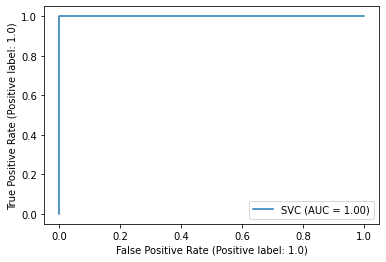

In [76]:
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.9787234042553191
0.96875


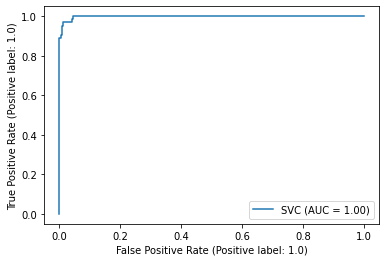

In [77]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [78]:
Model = SVC(random_state=100,class_weight='balanced')

params = {'C':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
          'gamma':[10000,1000,100,10,1,0.1,0.001,0.0001,0.00001]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=SVC(class_weight='balanced', random_state=100),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [10000, 1000, 100, 10, 1, 0.1, 0.001, 0.0001,
                                   1e-05]},
             scoring='accuracy', verbose=1)

In [79]:
Model_best = grid_search.best_estimator_

1.0
1.0


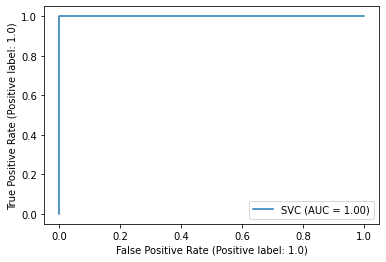

In [80]:
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

1.0
1.0


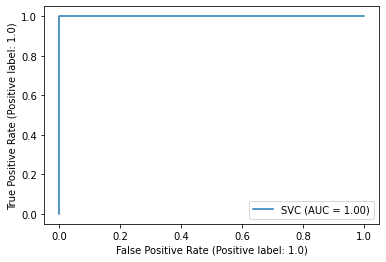

In [81]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [82]:
#As we can see we get almost perfect recall and accuracy scores using SVMs.
# END FOR NOW #